In [1]:
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.pyplot as plt



In [2]:
global_eff_auc_df = pd.read_csv('../glob_eff_auc_df.csv')
mean_degree_auc_df = pd.read_csv('../mean_degree_auc_df.csv')
mean_degree_and_gEff_auc_df = pd.merge(global_eff_auc_df, mean_degree_auc_df, on=["subject", "timepoint", "group"])

mean_degree_and_gEff_auc_df = mean_degree_and_gEff_auc_df[mean_degree_and_gEff_auc_df['group']=='st']

In [45]:

print('Overall Spearmann correlation coefficient:')
mean_degree_and_gEff_auc_df[['mean_degree_auc', 'glob_eff_auc']].corr(method='spearman')

Overall Spearmann correlation coefficient:


,mean_degree_auc,glob_eff_auc
mean_degree_auc,1.000000,0.928195
glob_eff_auc,0.928195,1.000000


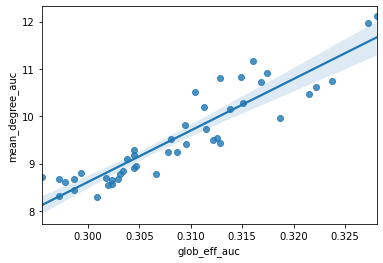

In [46]:
ax = sns.regplot(x="glob_eff_auc", y="mean_degree_auc", data=mean_degree_and_gEff_auc_df
                 )

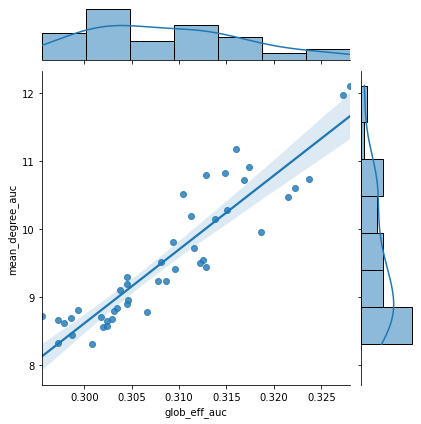

In [47]:
sns.jointplot(x="glob_eff_auc", y="mean_degree_auc", data=mean_degree_and_gEff_auc_df,
                 kind="reg"
                 )

/Users/jk1/opt/anaconda3/envs/resilience_stroke/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


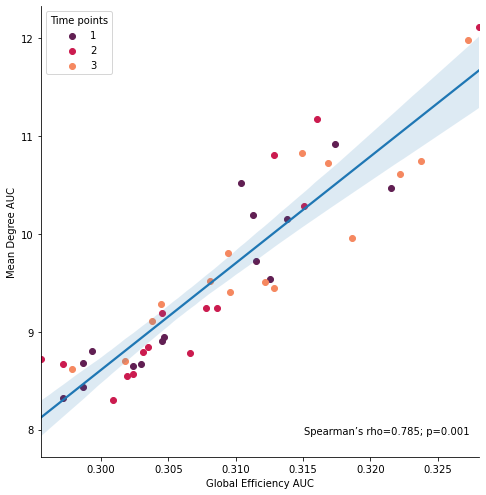

In [48]:
ax = sns.FacetGrid(mean_degree_and_gEff_auc_df, hue="timepoint", size=7, palette='rocket') \
   .map(plt.scatter, "glob_eff_auc", "mean_degree_auc") \
   # .add_legend([], [], 'nom')
ax = sns.regplot(x="glob_eff_auc", y="mean_degree_auc", data=mean_degree_and_gEff_auc_df, scatter=False,
                 line_kws={'alpha':1})


ax.legend(ax.get_legend_handles_labels()[0], ['1', '2', '3'], title="Time points")

ax.annotate('Spearman’s rho=0.785; p=0.001', xy=(.6, .05), xycoords=ax.transAxes)

ax.set_xlabel('Global Efficiency AUC')
ax.set_ylabel('Mean Degree AUC')

fig = ax.get_figure()

plt.show()

In [49]:
fig.savefig('geff_auc_mean_degree_correlation.svg', bbox_inches="tight", format='svg', dpi=1200)


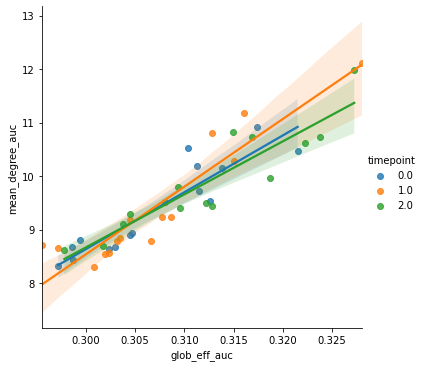

In [50]:

g = sns.lmplot(x="glob_eff_auc", y="mean_degree_auc", data=mean_degree_and_gEff_auc_df,
           hue='timepoint')

### Plotting: changement de Eglob vs le changement de mean degree entre TP2 et TP3


In [13]:
tp2_mean_degree_and_gEff_auc_df = mean_degree_and_gEff_auc_df[mean_degree_and_gEff_auc_df['timepoint']==1].reset_index()
tp3_mean_degree_and_gEff_auc_df = mean_degree_and_gEff_auc_df[mean_degree_and_gEff_auc_df['timepoint']==2].reset_index()

delta_tp2_vs_tp3_df = pd.DataFrame()
delta_tp2_vs_tp3_df["mean_degree_auc"] = tp3_mean_degree_and_gEff_auc_df["mean_degree_auc"] - tp2_mean_degree_and_gEff_auc_df["mean_degree_auc"]
delta_tp2_vs_tp3_df["glob_eff_auc"] = tp3_mean_degree_and_gEff_auc_df["glob_eff_auc"] - tp2_mean_degree_and_gEff_auc_df["glob_eff_auc"]

Text(27.0, 0.5, 'Change in Mean Degree')

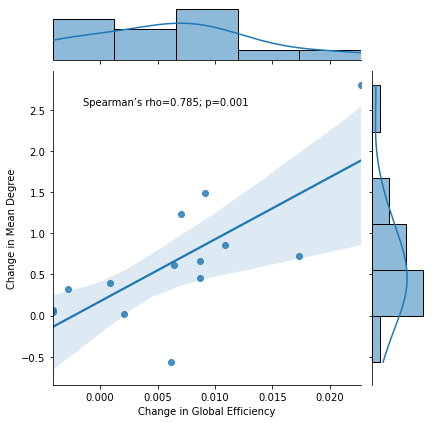

In [41]:
g = sns.jointplot(x="glob_eff_auc", y="mean_degree_auc", data=delta_tp2_vs_tp3_df,
                 kind="reg"
                 )

g.ax_joint.annotate('Spearman’s rho=0.785; p=0.001',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center')

g.ax_joint.set_xlabel('Change in Global Efficiency')
g.ax_joint.set_ylabel('Change in Mean Degree')

In [42]:
g.fig.savefig('delta_tp2vs3_geff_auc_mean_degree_correlation.svg', bbox_inches="tight", format='svg', dpi=1200)


In [40]:
pal = sns.color_palette('rocket', n_colors=3)
rgb_pal = [[value * 255 for value in color] for color in pal]
print(pal)
print(rgb_pal)
pal

[(0.38092887, 0.12061482, 0.32506528), (0.7965014, 0.10506637, 0.31063031), (0.95922872, 0.53307513, 0.3748895)]
[[97.13686184999999, 30.7567791, 82.8916464], [203.107857, 26.791924350000002, 79.21072905000001], [244.6033236, 135.93415815, 95.5968225]]


[(0.38092887, 0.12061482, 0.32506528),
 (0.7965014, 0.10506637, 0.31063031),
 (0.95922872, 0.53307513, 0.3748895)]